In [24]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df.head()

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232


In [ ]:
import numpy as np
from scipy import stats

def chi_var_test(x, var0, alternative='two-sided'):
    lenth = len(x)
    chi_stat = (lenth-1) * np.var(x, ddof=1) / var0

    temp = stats.chi2.cdf(chi_stat, lenth-1)

    if alternative == 'two-sided':
        pvalue = 2*(1-temp) if temp > 0.5 else 2*temp
    elif alternative == 'great':
        pvalue = 1-temp
    elif alternative == 'less':
        pvalue = temp
    else:
        print("Error")
    
    return chi_stat, pvalue

chi_stat, pvalue = chi_var_test(df.content, 1.3, 'two-sided')
print('chi_statistics : {}\nP-vlaue : {}'.format(chi_stat, pvalue))

1.가설설정
  - 귀무가설 : 분산은 1.3이다
  - 대립가설 : 분산은 1.3이 아니다.

2.유의수준 α 결정 : 0.05

3.기각역 설정

4.검정통계량 계산
  - 통계량 : 328.29
  - p-value : 4.27e-08

5.판정
  - p-value는 4.27e-08으로 유의수준 0.05 수준에서 귀무가설을 기각하고 대립가설을 채택함

In [6]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
df.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


In [11]:
df['np'] = df['error_case_number']
df['p'] = df['error_case_number']/200
pbar = df.np.sum()/(200*100)
ucl = pbar + 3*((pbar*(1-pbar)/200))**(1/2)
lcl = pbar - 3*((pbar*(1-pbar)/200))**(1/2)


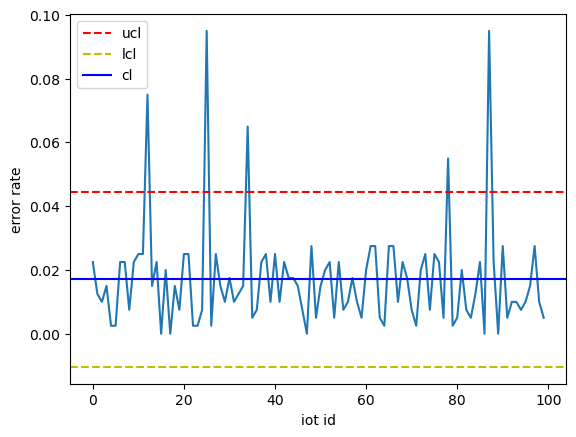

In [13]:
import matplotlib.pyplot as plt

plt.plot(df.p)
plt.axhline(y=ucl, color='r', linestyle='--', label='ucl')
plt.axhline(y=lcl, color='y', linestyle='--', label='lcl')
plt.axhline(y=pbar, color='b', label='cl')
plt.legend()
plt.ylabel('error rate')
plt.xlabel('iot id')
plt.show()

In [8]:
pbar

0.01705

In [69]:
df.head(15)

,iot_number,error_case_number,np,p,Pbar
0,1,4.5,4.5,0.0225,2.0
1,2,2.5,2.5,0.0125,2.0
2,3,2.0,2.0,0.0100,2.0
3,4,3.0,3.0,0.0150,2.0
4,5,0.5,0.5,0.0025,2.0
5,6,0.5,0.5,0.0025,2.0
6,7,4.5,4.5,0.0225,2.0
7,8,4.5,4.5,0.0225,2.0
8,9,1.5,1.5,0.0075,2.0
9,10,4.5,4.5,0.0225,2.0
